1.        Загрузить датасет, расположенный по адресу: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
2.        С помощью встроенных функций работы с файлами формата *.csv открыть файл GlobalLandTemperaturesByCity.csv
3.        Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для России.
4.        Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для города Белгород.
5.        Рассчитать максимальную и минимальную средние месячную и годовую температуры для города Абакан.
6.        Определить даты, когда были зафиксированы максимальная и минимальная средние температуры в городе Архангельск.
7.        Построить график изменения средней температуры по годам для России за все время измерений.
8.        Построить график изменения средней температуры по года для города Благовещенск за все время измерений.
9.        Рассчитать среднюю месячную температуры для России за все время измерений и построить гистограмму распределения.
10.      Рассчитать среднюю месячную температуры для России за все время измерений и построить гистограмму распределения.
11.      Рассчитать среднюю месячную температуры для города Батайск за все время измерений и построить гистограмму распределения.

Результат оформить в виде jupiter ноутбука и разместить в репозитарии github

In [1]:
import numpy as np
import pandas as pd

Пункт 2. Открытие файла на чтение
-----


In [2]:
file_name = 'GlobalLandTemperaturesByCity.csv'
src_data = pd.read_csv(file_name, delimiter=',')



Пункт 3. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для России.
---

In [3]:
# Выборка данных по значению колонки 'Country' == Russia
rus_data = src_data[src_data['Country'] == 'Russia']

# Преобразуем дату в datetime 
rus_data['dt'] = pd.to_datetime(rus_data['dt'])

# Добавляем столбец со значением века
rus_data['Century'] = rus_data['dt'].dt.year//100 +1

# Группируем данные по значению века, вычисляем среднюю температуру
century_mean_rus_data = rus_data.groupby('Century')['AverageTemperature'].mean()
print(century_mean_rus_data)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Century
18    4.220250
19    2.875905
20    3.319573
21    4.730073
Name: AverageTemperature, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Пункт 4. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для города Белгород.
-----

In [4]:
# Выборка данных по значению колонки 'City' == Belgorod из данных по России
Belgorod_data = rus_data[rus_data['City'] == 'Belgorod']
century_mean_blg_data = Belgorod_data.groupby('Century')['AverageTemperature'].mean()
print(century_mean_blg_data)

Century
18    6.000228
19    5.711438
20    6.266888
21    7.868878
Name: AverageTemperature, dtype: float64


Пункт 5. Рассчитать максимальную и минимальную средние месячную и годовую температуры для города Абакан.
---

In [5]:
# Выборка данных по значению колонки 'City' == Abakan из данных по России
Abakan_data = rus_data[rus_data['City'] == 'Abakan']
Abakan_mean_month_data = Abakan_data.groupby([Abakan_data['dt'].dt.year, Abakan_data['dt'].dt.month])['AverageTemperature'].mean()
print(f'Abakan MIN month avg temperature = {Abakan_mean_month_data.min()}')
print(f'Abakan MAX month avg temperature = {Abakan_mean_month_data.max()}')
print('\n')


Abakan_mean_year_data = Abakan_data.groupby(Abakan_data['dt'].dt.year)['AverageTemperature'].mean()
print(f'Abakan MIN year avg temperature = {Abakan_mean_year_data.min()}')
print(f'Abakan MAX year avg temperature = {Abakan_mean_year_data.max()}')


Abakan MIN month avg temperature = -31.138
Abakan MAX month avg temperature = 21.503


Abakan MIN year avg temperature = -2.778
Abakan MAX year avg temperature = 2.6065833333333344


Пункт 6. Определить даты, когда были зафиксированы максимальная и минимальная средние температуры в городе Архангельск.
----

In [6]:
# Выборка данных по значению колонки 'City' == Arkhangelsk из данных по России
Arkhangelsk_data = rus_data[rus_data['City'] == 'Arkhangelsk']

Arkhangelsk_min_date = Arkhangelsk_data.loc[Arkhangelsk_data['AverageTemperature'].idxmin(), 'dt'].date()
Arkhangelsk_max_date = Arkhangelsk_data.loc[Arkhangelsk_data['AverageTemperature'].idxmax(), 'dt'].date()
print(f'Дата минимальной средней температуры в Архангельске: {Arkhangelsk_min_date}')
print(f'Дата максимальной средней температуры в Архангельске: {Arkhangelsk_max_date}')

Дата минимальной средней температуры в Архангельске: 1985-01-01
Дата максимальной средней температуры в Архангельске: 1960-07-01


Пункт 7. Построить график изменения средней температуры по годам для России за все время измерений.
---

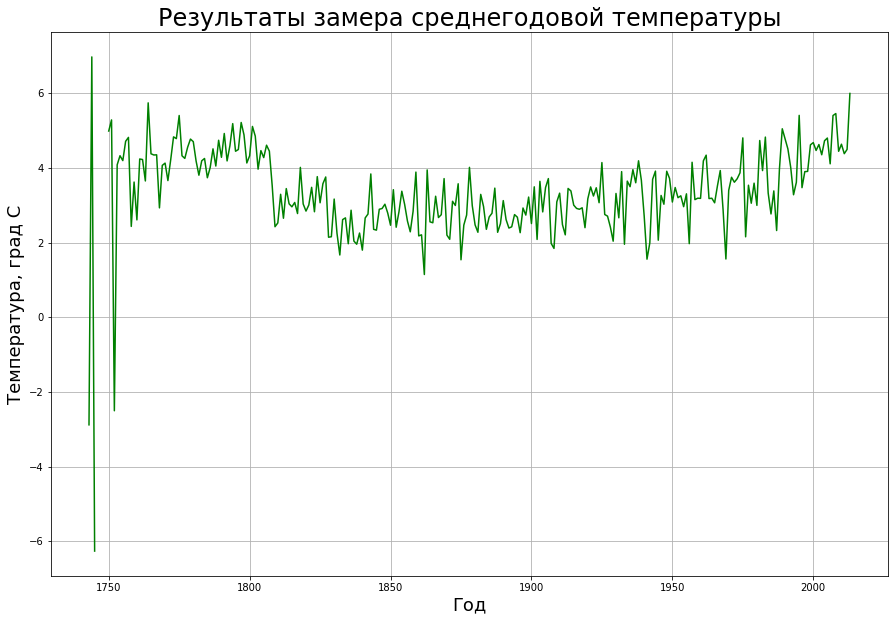

In [35]:
import matplotlib.pyplot as plt
plt.close('all') 

RUS_avg_mean = rus_data.groupby(rus_data['dt'].dt.year)['AverageTemperature'].mean()

plt.figure(figsize=(15,10))
plt.grid()
plt.title('Результаты замера среднегодовой температуры', fontsize = 24)
plt.xlabel('Год', fontsize = 18)
plt.ylabel('Температура, град С', fontsize = 18)
plt.plot(RUS_avg_mean, color = 'green')
plt.show()





Пункт 8. Построить график изменения средней температуры по года для города Благовещенск за все время измерений.
---

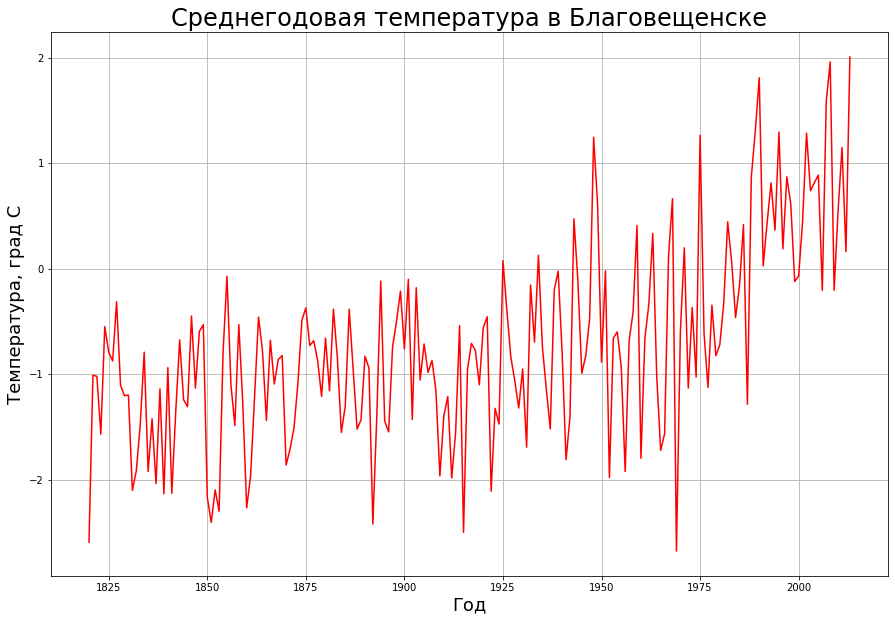

In [36]:
Blagov_data = rus_data[rus_data['City'] == 'Blagoveshchensk']
Blagov_mean_year_data = Blagov_data.groupby(Blagov_data['dt'].dt.year)['AverageTemperature'].mean()

plt.figure(figsize=(15,10))
plt.grid()
plt.title('Среднегодовая температура в Благовещенске', fontsize = 24)
plt.xlabel('Год', fontsize = 18)
plt.ylabel('Температура, град С', fontsize = 18)
plt.plot(Blagov_mean_year_data, color = 'red')
plt.show()
